In [20]:
import random as rand
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def sine_point_generator(num):
    points = []
    for i in range(num):
        x_coord = rand.uniform(-1, 1)
        y_coord = np.sin(np.pi*x_coord)
        point = [x_coord, y_coord]
        points.append(point)
    return points

In [42]:
def x_generator(num):
    points = []
    for i in range(num):
        x_coord = rand.uniform(-1, 1)
        point = [x_coord]
        points.append(point)
    return points

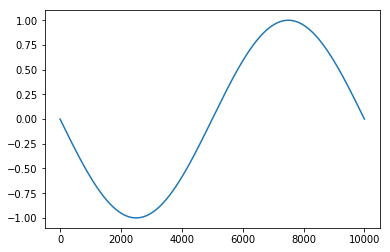

In [22]:
x = np.linspace(-1, 1, 10000)
plt.plot(np.sin(np.pi*x))

In [89]:
def a_hat_generator(num):
    a = 0
    for i in range(num):
        pts = sine_point_generator(2)
        x1 = pts[0][0]
        x2 = pts[1][0]
        a += (x1 *  np.sin(np.pi * x1)
              + x2 * np.sin(np.pi * x2)) / (x1**2 + x2**2)
    return a / num
a_hat_generator(100000)

1.4299560201942758

In [98]:
def bias_calc(num, a_hat):
    bias = 0
    x = x_generator(num)
    for i in range(len(x)):
        bias += (a_hat * x[i][0] - np.sin(np.pi * x[i][0]))**2
    return bias / num
a_hat = a_hat_generator(100000)
bias_calc(100000, a_hat)

0.27019770223340095

In [112]:
def var_calc(num_trials, num_x):
    a = 0
    var = 0
    a_hat = a_hat_generator(1000)
    for i in range(num_trials):
        pts = sine_point_generator(2)
        x1 = pts[0][0]
        x2 = pts[1][0]
        a = (x1 *  np.sin(np.pi * x1)
              + x2 * np.sin(np.pi * x2)) / (x1**2 + x2**2)
        x = x_generator(num_x)
        for j in range(len(x)):
            var += (a * x[j][0] - a_hat * x[j][0])**2
    return var / (num_trials * num_x)
var_calc(1000, 1000)

0.23788252786500277

In [140]:
def e_out_ax_squared(num_trials, num_x):
    a = 0
    e_out = 0
    for i in range(num_trials):
        pts = sine_point_generator(2)
        x1 = pts[0][0]
        x2 = pts[1][0]
        a = (x1**2 *  np.sin(np.pi * x1)
              + x2**2 * np.sin(np.pi * x2)) / (x1**4 + x2**4)
        x = x_generator(num_x)
        for j in range(len(x)):
            e_out += (a * x[j][0] - np.sin(np.pi * x[j][0]))**2
    return e_out / (num_trials * num_x)
e_out_ax_squared(1000, 1000)

16.249507535588087

In [134]:
def e_out_ax_squared_plusb(num_trials, num_x):
    a = 0
    e_out = 0
    b = 0
    for i in range(num_trials):
        pts = sine_point_generator(2)
        x1 = pts[0][0]
        x2 = pts[1][0]
        a = (np.sin(np.pi * x1) - np.sin(np.pi * x2)) / (x1**2 - x2**2)
        b = (np.sin(np.pi * x1)) - a * x1**2
        x = x_generator(num_x)
        for j in range(len(x)):
            e_out += ((a * x[j][0] + b) - np.sin(np.pi * x[j][0]))**2
    return e_out / (num_trials * num_x)
e_out_ax_squared_plusb(1000, 1000)

1038.0706296730361